In [1]:
import pandas as pd
from datetime import timedelta

In [2]:
# Load the training data
data = pd.read_parquet('train.parquet')

In [3]:
# Filter data for "Target Drug" users only
target_drug_data = data[data['Incident'] == 'TARGET DRUG']

In [4]:
# Find the ideal treatment duration (e.g., 1 year)
ideal_treatment_duration = timedelta(days=365)

In [5]:
# Define the ideal treatment duration in months (e.g., 12 months for 1 year)
ideal_treatment_duration_months = 12

In [6]:
# Function to calculate the drop-off rate for "Target Drug"
def calculate_drop_off_rate(df, ideal_treatment_duration):
    df['Months_on_drug'] = (df.groupby('Patient-Uid')['Date'].diff() / pd.Timedelta(days=30)).fillna(0)
    drop_off_rate = df[df['Months_on_drug'] >= ideal_treatment_duration]
    drop_off_rate = drop_off_rate.groupby(drop_off_rate['Date'].dt.to_period('M')).size()
    return drop_off_rate

In [7]:
# Calculate the drop-off rate for "Target Drug"
drop_off_rate = calculate_drop_off_rate(target_drug_data, ideal_treatment_duration_months)

C:\Users\Ram\AppData\Local\Temp\ipykernel_13536\1031782260.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Months_on_drug'] = (df.groupby('Patient-Uid')['Date'].diff() / pd.Timedelta(days=30)).fillna(0)


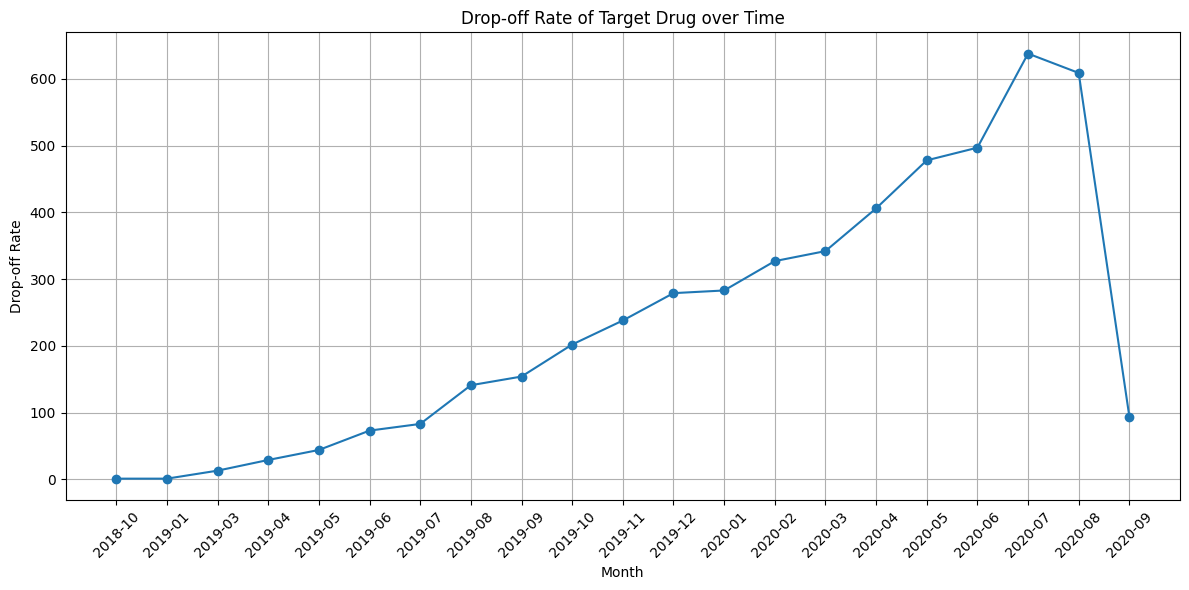

In [8]:
# Plot the drop-off rate over time
import matplotlib.pyplot as plt

# Plot the drop-off rate over time
plt.figure(figsize=(12, 6))
plt.plot(drop_off_rate.index.astype(str), drop_off_rate.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Drop-off Rate')
plt.title('Drop-off Rate of Target Drug over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

